# Analyse Statistique

### 1. Imports

In [1]:
# --------------------------------------------------------
# 0. Importations initiales
# --------------------------------------------------------
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
#import pingouin as pg  # <-- vous pouvez décommenter si vous voulez utiliser Pingouin
import matplotlib.pyplot as plt

# Optionnel : configurations esthétiques
# plt.style.use('ggplot')   # par exemple, ou autre


## 1. Chargement et préparation des données

In [2]:
# --------------------------------------------------------
# 1. Chargement des données
# --------------------------------------------------------
# Remplacez le nom du fichier par le vôtre
data_file = "SHS-Lie detection AI_April 2, 2025_08.22.csv"
df = pd.read_csv(data_file)

# Aperçu du DataFrame
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'SHS-Lie detection AI_April 2, 2025_08.22.csv'

### Nettoyage / Filtrage

- Vérifier la cohérence des données.
- Supprimer ou identifier les valeurs manquantes ou aberrantes.
- Renommer les colonnes si nécessaire.


In [3]:
# Exemple (à adapter):
# df = df.dropna(subset=["participant_id", "accuracy_pre", "accuracy_post", "confidence_pre", "confidence_post"])

# Renommer si besoin
# df.rename(columns={
#     "old_colname_1": "accuracy_pre",
#     "old_colname_2": "accuracy_post",
#     ...
# }, inplace=True)

df.info()
df.describe()


NameError: name 'df' is not defined

## 2. Création des variables d'intérêt

Ici, on crée par exemple la différence de précision et de confiance (post - pré) pour chaque participant.


In [ ]:
# Supposez que df contient déjà accuracy_pre, accuracy_post, confidence_pre, confidence_post
df["accuracy_diff"] = df["accuracy_post"] - df["accuracy_pre"]
df["confidence_diff"] = df["confidence_post"] - df["confidence_pre"]

df.head()


## 3. Statistiques descriptives


In [4]:
# Statistiques descriptives globales
print(df[["accuracy_pre", "accuracy_post", "confidence_pre", "confidence_post"]].describe())

# Par groupe de Feedback Modality (Audio vs. Texte) et Feedback Source (Humain vs. IA)
group_stats = df.groupby(["feedback_modality", "feedback_source"])[["accuracy_pre","accuracy_post","confidence_pre","confidence_post"]].describe()
group_stats


NameError: name 'df' is not defined

### Visualisation (optionnel)

On peut faire quelques graphiques (histogrammes, boxplots) pour visualiser la distribution des variables et tester la normalité.


NameError: name 'df' is not defined

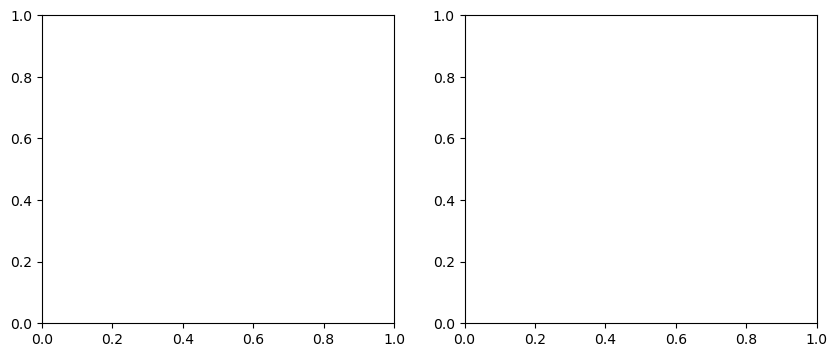

In [5]:
# Histograms
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df["accuracy_diff"].dropna(), bins=10)
axes[0].set_title("Distribution accuracy_diff")

axes[1].hist(df["confidence_diff"].dropna(), bins=10)
axes[1].set_title("Distribution confidence_diff")

plt.show()


## 4. ANOVA mixte 2×2

Nous avons :
- Facteur intra-sujets : Feedback Source (Humain vs. IA)
- Facteur inter-sujets : Feedback Modality (Audio vs. Texte)
- Variable dépendante : par exemple *accuracy_diff* (et on fera la même chose pour *confidence_diff*).

### Option A : Avec Pingouin (Mixed ANOVA)


In [ ]:
# Exemple si vous utilisez pingouin.
# 1. Il faut avoir un format "long" :
#    Chaque participant apparaît dans 2 lignes (Humain vs. IA) pour la mesure within-subject
#    feedback_modality reste constant pour le participant.

# Démélangez ou "melt" si nécessaire. Supposez que vous avez une variable 'feedback_source' 
# déjà incrémentée sur chaque ligne. 
# Sinon, vous devez réorganiser le DataFrame (pivot_longer, etc.).

# Pour la démonstration seulement (pseudo-code):
"""
df_long = pd.melt(
    df, 
    id_vars=["participant_id", "feedback_modality"], 
    value_vars=["accuracy_diff_humain","accuracy_diff_IA"], 
    var_name="feedback_source", 
    value_name="accuracy_diff"
)
# feedback_source pourra être "humain" ou "IA" selon la colonne d'origine
# Ensuite:
anova_results = pg.mixed_anova(dv="accuracy_diff",
                               within="feedback_source",
                               between="feedback_modality",
                               subject="participant_id",
                               data=df_long)
print(anova_results)
"""


### Option B : Avec Statsmodels (MixedLM)

Il faut un modèle linéaire mixte, avec participant_id comme effet aléatoire (group).  
Vous pouvez également modéliser l’interaction.

*(La mise en forme dépend de la manière dont vos données sont structurées.)*


In [6]:
# Exemple très simplifié (vous devrez sans doute adapter le code et le format):
# Notons que dans Statsmodels, il faut coder feedback_source en 0/1 ou en variable catégorielle.

# Supposez que feedback_source (Humain vs. IA) et feedback_modality (Audio vs. Texte) 
# sont des colonnes du DF 'df_long' (chaque ligne = 1 participant × 1 condition).
# On va créer un modèle mixte:
"""
model = smf.mixedlm("accuracy_diff ~ feedback_source * feedback_modality", 
                    df_long, 
                    groups=df_long["participant_id"])
fit = model.fit()
print(fit.summary())
"""


'\nmodel = smf.mixedlm("accuracy_diff ~ feedback_source * feedback_modality", \n                    df_long, \n                    groups=df_long["participant_id"])\nfit = model.fit()\nprint(fit.summary())\n'

## 5. Comparaisons t-tests appariés (avant/après)


In [7]:
# Exemple : Comparer la confiance avant/après pour le groupe "audio"
audio_df = df[df["feedback_modality"] == "audio"].dropna(subset=["confidence_pre","confidence_post"])
t_stat, p_val = stats.ttest_rel(audio_df["confidence_pre"], audio_df["confidence_post"])
print(f"Groupe Audio - t={t_stat:.2f}, p={p_val:.4f}")

# Faire la même chose pour d'autres sous-groupes ou pour la variable accuracy_pre vs accuracy_post


NameError: name 'df' is not defined

## 6. Analyse qualitative des réponses ouvertes

Vous pouvez faire un premier aperçu en affichant les réponses, puis procéder à un codage manuel ou semi-automatisé.


In [ ]:
# Exemple : si la question ouverte est dans une colonne "open_response"
# On peut consulter les premières réponses
if "open_response" in df.columns:
    for idx, resp in enumerate(df["open_response"].dropna().head(10)):
        print(f"Participant {idx}: {resp}\n")


*(Ensuite, l’analyse approfondie peut se faire hors-ligne ou via un script dédié, 
avec par ex. des techniques de text-mining ou un codage thématique manuel.)*

---

## 7. Conclusion / Interprétation

- Interprétez les résultats des analyses (ANOVA, t-tests, etc.).
- Discutez des effets principaux, interactions et éventuels effets post hoc.
- Intégrez les thèmes émergents de l’analyse qualitative.

---
